In [18]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

BASE_DIR = Path(".").resolve()

DATA_DIR = BASE_DIR / "data"
ART_DIR = BASE_DIR / "artifacts"
LABELS_DIR = ART_DIR / "labels"
FIG_DIR = ART_DIR / "figures"

DATA_DIR.mkdir(exist_ok=True)
ART_DIR.mkdir(exist_ok=True)
LABELS_DIR.mkdir(exist_ok=True)
FIG_DIR.mkdir(exist_ok=True)

BASE_DIR, DATA_DIR, ART_DIR, FIG_DIR

(WindowsPath('C:/Users/zabot/Documents/zabotkin_aie_group3/homeworks/HW07'),
 WindowsPath('C:/Users/zabot/Documents/zabotkin_aie_group3/homeworks/HW07/data'),
 WindowsPath('C:/Users/zabot/Documents/zabotkin_aie_group3/homeworks/HW07/artifacts'),
 WindowsPath('C:/Users/zabot/Documents/zabotkin_aie_group3/homeworks/HW07/artifacts/figures'))

In [19]:
df = pd.read_csv(DATA_PATH)

display(df.head())
df.info()

display(df.describe().T)
display(df.isna().sum())

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

,count,mean,std,min,25%,50%,75%,max
id,18000.0,9000.500000,5196.296758,1.000000e+00,4500.750000,9000.500000,13500.250000,18000.000000
f01,18000.0,-0.418555,2.178005,-1.001470e+01,-1.866134,-0.465100,0.966393,9.589975
f02,18000.0,0.614251,3.926778,-1.551032e+01,-2.048192,0.600291,3.229850,15.417329
f03,18000.0,0.004559,1.000134,-4.031762e+00,-0.673127,0.003581,0.671390,3.817025
f04,18000.0,0.059000,5.713672,-2.366326e+01,-3.544964,0.072826,3.689490,26.815691
f05,18000.0,0.405086,2.497581,-1.228931e+01,-1.153000,0.485625,2.075739,10.665184
f06,18000.0,0.012123,0.987226,-3.741536e+00,-0.653090,0.018765,0.689304,3.528280
f07,18000.0,-0.283473,2.193891,-9.591425e+00,-1.743214,-0.251263,1.195481,7.794627
f08,18000.0,-0.266880,2.081431,-8.293319e+00,-1.688121,-0.302463,1.109589,8.892834
f09,18000.0,0.255107,2.225776,-1.365574e+01,-1.177480,0.350739,1.764113,8.699629


id         0
f01        0
f02        0
f03        0
f04        0
f05        0
f06        0
f07        0
f08        0
f09        0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
f27        0
f28        0
f29        0
f30        0
f31        0
f32        0
f33        0
f34        0
f35        0
x_int_1    0
x_int_2    0
target     0
dtype: int64

In [20]:
id_col = None
for c in ["sample_id", "id"]:
    if c in df.columns:
        id_col = c
        break

if id_col is not None:
    sample_id = df[id_col].values
    X = df.drop(columns=[id_col])
else:
    # если идентификатора нет — создаём искусственный
    sample_id = np.arange(len(df))
    X = df.copy()

X.shape

(18000, 38)

In [21]:
preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_scaled = preprocess.fit_transform(X)
X_scaled.shape

(18000, 38)

In [22]:
def internal_metrics(X_emb, labels):
    labels = np.asarray(labels)
    uniq = set(labels.tolist())

    # DBSCAN шум
    noise_frac = float(np.mean(labels == -1)) if (-1 in uniq) else 0.0

    # Если DBSCAN: метрики считаем на non-noise (как в ТЗ)
    if -1 in uniq:
        mask = labels != -1
        X_use = X_emb[mask]
        y_use = labels[mask]
    else:
        X_use = X_emb
        y_use = labels

    if len(set(y_use.tolist())) < 2:
        return {
            "silhouette": None,
            "davies_bouldin": None,
            "calinski_harabasz": None,
            "noise_frac": noise_frac
        }

    return {
        "silhouette": float(silhouette_score(X_use, y_use)),
        "davies_bouldin": float(davies_bouldin_score(X_use, y_use)),
        "calinski_harabasz": float(calinski_harabasz_score(X_use, y_use)),
        "noise_frac": noise_frac
    }

,algo,k,silhouette,davies_bouldin,calinski_harabasz,noise_frac,inertia
0,kmeans,2,0.067397,3.491416,1415.965326,0.0,634112.303954
1,kmeans,3,0.054813,3.380523,1100.870693,0.0,609441.617465
7,kmeans,9,0.054579,2.773527,658.714591,0.0,529039.938090
6,kmeans,8,0.053492,2.869353,697.695845,0.0,537969.909265
8,kmeans,10,0.053218,2.838787,621.568118,0.0,521756.753012


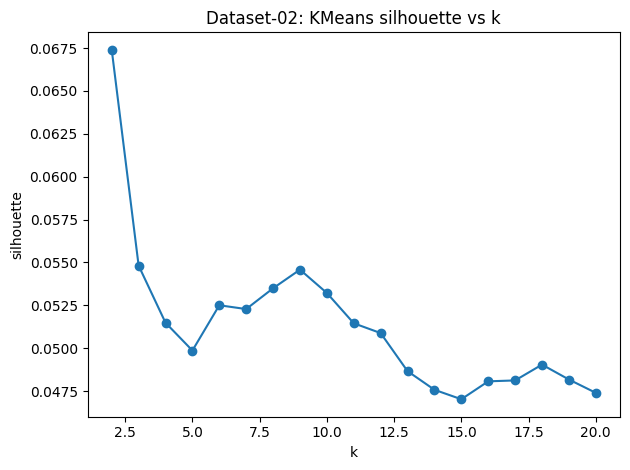

In [23]:
k_list = list(range(2, 21))

kmeans_rows = []
best_kmeans = None

for k in k_list:
    km = KMeans(n_clusters=k, n_init=20, random_state=RANDOM_STATE)
    labels = km.fit_predict(X_scaled)
    m = internal_metrics(X_scaled, labels)
    row = {"algo": "kmeans", "k": k, **m, "inertia": float(km.inertia_)}
    kmeans_rows.append(row)

    if m["silhouette"] is not None:
        if best_kmeans is None or m["silhouette"] > best_kmeans["metrics"]["silhouette"]:
            best_kmeans = {"model": km, "labels": labels, "metrics": m, "params": {"k": k}}

kmeans_df = pd.DataFrame(kmeans_rows)
display(kmeans_df.sort_values("silhouette", ascending=False).head(5))

plt.figure()
plt.plot(kmeans_df["k"], kmeans_df["silhouette"], marker="o")
plt.title("Dataset-02: KMeans silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.tight_layout()
plt.savefig(FIG_DIR / "ds02_kmeans_silhouette_vs_k.png", dpi=150)
plt.show()

In [24]:
eps_list = np.linspace(0.1, 2.0, 20)
min_samples_list = [5, 10]

dbscan_rows = []
best_dbscan = None

for ms in min_samples_list:
    for eps in eps_list:
        db = DBSCAN(eps=float(eps), min_samples=int(ms))
        labels = db.fit_predict(X_scaled)
        m = internal_metrics(X_scaled, labels)
        row = {"algo": "dbscan", "eps": float(eps), "min_samples": int(ms), **m}
        dbscan_rows.append(row)

        if m["silhouette"] is not None:
            if best_dbscan is None or m["silhouette"] > best_dbscan["metrics"]["silhouette"]:
                best_dbscan = {"model": db, "labels": labels, "metrics": m, "params": {"eps": float(eps), "min_samples": int(ms)}}

dbscan_df = pd.DataFrame(dbscan_rows)
display(dbscan_df.sort_values("silhouette", ascending=False).head(10))

,algo,eps,min_samples,silhouette,davies_bouldin,calinski_harabasz,noise_frac
0,dbscan,0.1,5,None,None,None,1.0
1,dbscan,0.2,5,None,None,None,1.0
2,dbscan,0.3,5,None,None,None,1.0
3,dbscan,0.4,5,None,None,None,1.0
4,dbscan,0.5,5,None,None,None,1.0
5,dbscan,0.6,5,None,None,None,1.0
6,dbscan,0.7,5,None,None,None,1.0
7,dbscan,0.8,5,None,None,None,1.0
8,dbscan,0.9,5,None,None,None,1.0
9,dbscan,1.0,5,None,None,None,1.0


In [25]:
def pca_plot(X_emb, labels, title, path):
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X2 = pca.fit_transform(X_emb)
    plt.figure()
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=8)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.show()

candidates = []
if best_kmeans is not None:
    candidates.append(("kmeans", best_kmeans))
if best_dbscan is not None:
    candidates.append(("dbscan", best_dbscan))

# критерий выбора: max silhouette (у DBSCAN метрики на non-noise)
best_name, best = max(candidates, key=lambda x: x[1]["metrics"]["silhouette"])

best_labels = best["labels"]
best_params = best["params"]
best_metrics = best["metrics"]

best_name, best_params, best_metrics

('kmeans',
 {'k': 2},
 {'silhouette': 0.06739651011368043,
  'davies_bouldin': 3.491415540938381,
  'calinski_harabasz': 1415.9653261784579,
  'noise_frac': 0.0})

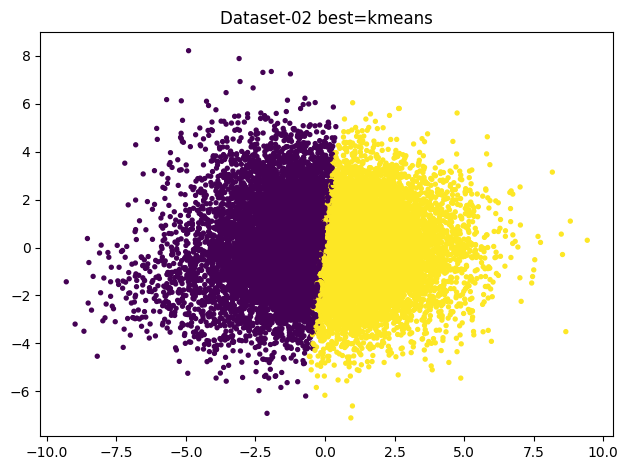

In [26]:
pca_plot(
    X_scaled,
    best_labels,
    title=f"Dataset-02 best={best_name}",
    path=FIG_DIR / "ds02_best_pca.png"
)

In [27]:
labels_out = pd.DataFrame({"sample_id": sample_id, "cluster_label": best_labels})
labels_out.to_csv(LABELS_DIR / "labels_hw07_ds02.csv", index=False)

# metrics_summary.json (пока только ds02; потом добавишь ds01/ds04)
metrics_summary = {
    "S07-hw-dataset-02.csv": {
        "kmeans": kmeans_df.to_dict(orient="records"),
        "dbscan": dbscan_df.to_dict(orient="records"),
        "best": {
            "algo": best_name,
            "params": best_params,
            "metrics": best_metrics,
            "selection_criterion": "max_silhouette (DBSCAN metrics computed on non-noise points)"
        }
    }
}

with open(ART_DIR / "metrics_summary.json", "w", encoding="utf-8") as f:
    json.dump(metrics_summary, f, indent=2, ensure_ascii=False)

best_configs = {
    "S07-hw-dataset-02.csv": metrics_summary["S07-hw-dataset-02.csv"]["best"]
}

with open(ART_DIR / "best_configs.json", "w", encoding="utf-8") as f:
    json.dump(best_configs, f, indent=2, ensure_ascii=False)